In [1]:
from IPython.core.display import display, HTML
#makes the display bars longer and spread out 100% across the screen width
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

# Add the repo directory vivarium_research_ciff_sam/ to sys.path
import os, sys
repo_path = os.path.abspath('../..')
sys.path.append(repo_path)
# Assumes vivarium_research_ciff_sam/ is in sys.path
import nathaniel.model_validation.vivarium_output_loader as vol
import nathaniel.model_validation.ciff_output_processing as cop

!pwd
!whoami
!date

/ihme/homes/ndbs/vivarium_research_ciff_sam/nathaniel/scratch__gitignore__
ndbs
Fri Jul 30 11:52:20 PDT 2021


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
!ls /ihme/homes/ndbs/vivarium_results/ciff_malnutrition/verification_and_validation/

v2.1_gbd_2020_wasting  v2.3_wasting_birth_prevalence


In [5]:
os.path.abspath('~/vivarium_results')

'/ihme/homes/ndbs/vivarium_research_ciff_sam/nathaniel/scratch__gitignore__/~/vivarium_results'

# Define directories

In [6]:
# sim results path:
# /ihme/costeffectiveness/results/vivarium_ciff_sam/v2.3_wasting_birth_prevalence/ciff_sam/2021_07_26_17_14_31/count_data

project_results_dir = '/ihme/costeffectiveness/results/vivarium_ciff_sam'
model_name = 'v2.3_wasting_birth_prevalence'
model_timestamp = '2021_07_26_17_14_31'

model_count_data_dir = f'{project_results_dir}/{model_name}/ciff_sam/{model_timestamp}/count_data/'

project_vv_directory_name = 'ciff_malnutrition/verification_and_validation'
username = 'ndbs'

output_dir = f'/ihme/homes/{username}/vivarium_results/{project_vv_directory_name}/{model_name}'

share_output_dir = f'/share/scratch/users/ndbs/vivarium_results/{project_vv_directory_name}/{model_name}'
j_output_dir = f'/home/j/Project/simulation_science/{project_vv_directory_name}/{model_name}'

# Load transformed count data

In [7]:
data = vol.load_transformed_count_data(model_count_data_dir)
data.keys()

dict_keys(['wasting_transition_count', 'wasting_state_person_time', 'deaths', 'population', 'ylls', 'ylds', 'disease_state_person_time', 'disease_transition_count'])

# Write a small class to wrap the count data dictionary and provide more convenient access via attributes

In [8]:
class VivariumCountData:
    def __init__(self, table_dict):
        for table_name, table in table_dict.items():
            setattr(self, table_name, table)
    
    def to_dict(self):
        return dict(self.__dict__)
    
    def __getitem__(self, key):
        return self.__dict__[key]
    
    def table_names(self):
        return list(self.__dict__.keys())

d = VivariumCountData(data)
print(d.__dict__ is d.to_dict())
d.table_names()

False


['wasting_transition_count',
 'wasting_state_person_time',
 'deaths',
 'population',
 'ylls',
 'ylds',
 'disease_state_person_time',
 'disease_transition_count']

In [9]:
d.to_dict().keys()

dict_keys(['wasting_transition_count', 'wasting_state_person_time', 'deaths', 'population', 'ylls', 'ylds', 'disease_state_person_time', 'disease_transition_count'])

# Rename mislabeled 'cause' column in wasting_state_person_time table

In [10]:
d.wasting_state_person_time

,sex,year,cause,measure,input_draw,scenario,value,age
0,female,2022,mild_child_wasting,state_person_time,29,baseline,67.629021,early_neonatal
1,female,2022,mild_child_wasting,state_person_time,29,baseline,242.324435,late_neonatal
2,female,2022,mild_child_wasting,state_person_time,29,baseline,3526.287474,1-5_months
3,female,2022,mild_child_wasting,state_person_time,29,baseline,8192.839151,6-11_months
...,...,...,...,...,...,...,...,...
2876,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,4633.670089,1-5_months
2877,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,5516.294319,6-11_months
2878,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,11032.581793,12_to_23_months
2879,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,63806.663929,2_to_4


In [11]:
d.wasting_state_person_time.rename(columns={'cause':'wasting_state'}, inplace=True)
d.wasting_state_person_time

,sex,year,wasting_state,measure,input_draw,scenario,value,age
0,female,2022,mild_child_wasting,state_person_time,29,baseline,67.629021,early_neonatal
1,female,2022,mild_child_wasting,state_person_time,29,baseline,242.324435,late_neonatal
2,female,2022,mild_child_wasting,state_person_time,29,baseline,3526.287474,1-5_months
3,female,2022,mild_child_wasting,state_person_time,29,baseline,8192.839151,6-11_months
...,...,...,...,...,...,...,...,...
2876,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,4633.670089,1-5_months
2877,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,5516.294319,6-11_months
2878,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,11032.581793,12_to_23_months
2879,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,63806.663929,2_to_4


In [12]:
d['wasting_state_person_time'] # Test access via __getitem__

,sex,year,wasting_state,measure,input_draw,scenario,value,age
0,female,2022,mild_child_wasting,state_person_time,29,baseline,67.629021,early_neonatal
1,female,2022,mild_child_wasting,state_person_time,29,baseline,242.324435,late_neonatal
2,female,2022,mild_child_wasting,state_person_time,29,baseline,3526.287474,1-5_months
3,female,2022,mild_child_wasting,state_person_time,29,baseline,8192.839151,6-11_months
...,...,...,...,...,...,...,...,...
2876,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,4633.670089,1-5_months
2877,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,5516.294319,6-11_months
2878,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,11032.581793,12_to_23_months
2879,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,63806.663929,2_to_4


In [13]:
d.wasting_state_person_time.wasting_state.unique()

array(['mild_child_wasting', 'moderate_acute_malnutrition',
       'severe_acute_malnutrition', 'susceptible_to_child_wasting'],
      dtype=object)

# Investigate disease_state_person_time table

In [14]:
d.disease_state_person_time

,sex,year,cause,measure,input_draw,scenario,value,wasting_state,age
0,female,2022,diarrheal_diseases,state_person_time,29,baseline,3.405886,susceptible_to_child_wasting,early_neonatal
1,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.903491,mild_child_wasting,early_neonatal
2,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.325804,moderate_acute_malnutrition,early_neonatal
3,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.071184,severe_acute_malnutrition,early_neonatal
...,...,...,...,...,...,...,...,...,...
17276,male,2026,susceptible_to_measles,state_person_time,946,baseline,40351.155373,susceptible_to_child_wasting,2_to_4
17277,male,2026,susceptible_to_measles,state_person_time,946,baseline,13214.484600,mild_child_wasting,2_to_4
17278,male,2026,susceptible_to_measles,state_person_time,946,baseline,4637.531828,moderate_acute_malnutrition,2_to_4
17279,male,2026,susceptible_to_measles,state_person_time,946,baseline,973.463381,severe_acute_malnutrition,2_to_4


In [15]:
dd_person_time = d.disease_state_person_time.query('cause in ["diarrheal_diseases", "susceptible_to_diarrheal_diseases"]')
dd_person_time

,sex,year,cause,measure,input_draw,scenario,value,wasting_state,age
0,female,2022,diarrheal_diseases,state_person_time,29,baseline,3.405886,susceptible_to_child_wasting,early_neonatal
1,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.903491,mild_child_wasting,early_neonatal
2,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.325804,moderate_acute_malnutrition,early_neonatal
3,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.071184,severe_acute_malnutrition,early_neonatal
...,...,...,...,...,...,...,...,...,...
16700,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,baseline,39720.032854,susceptible_to_child_wasting,2_to_4
16701,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,baseline,12922.015058,mild_child_wasting,2_to_4
16702,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,baseline,4438.766598,moderate_acute_malnutrition,2_to_4
16703,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,baseline,851.515400,severe_acute_malnutrition,2_to_4


In [16]:
# Twice as many rows in this as in wasting state PT df
5760/2880

2.0

# Compare disease state PT from diarrhea with wasting state PT

The two dataframes should be equal, but they're not. Person-time counted by wasting is about 1.57 times as large as person-time counted by diarrhea (or the other causes).

In [17]:
# Sum DD person time df over the two cause states to get total person time in each wasting state
to_omit = ['cause', 'value']
groupby_columns = dd_person_time.columns.difference(to_omit).to_list()
dd_pt_by_wasting_state = dd_person_time.groupby(groupby_columns).value.sum()
dd_pt_by_wasting_state.reset_index()

,age,input_draw,measure,scenario,sex,wasting_state,year,value
0,1-5_months,29,state_person_time,baseline,female,mild_child_wasting,2022,2222.125941
1,1-5_months,29,state_person_time,baseline,female,mild_child_wasting,2023,876.001369
2,1-5_months,29,state_person_time,baseline,female,mild_child_wasting,2024,885.419576
3,1-5_months,29,state_person_time,baseline,female,mild_child_wasting,2025,890.078029
...,...,...,...,...,...,...,...,...
2876,late_neonatal,946,state_person_time,baseline,male,susceptible_to_child_wasting,2023,403.623546
2877,late_neonatal,946,state_person_time,baseline,male,susceptible_to_child_wasting,2024,405.452430
2878,late_neonatal,946,state_person_time,baseline,male,susceptible_to_child_wasting,2025,407.326489
2879,late_neonatal,946,state_person_time,baseline,male,susceptible_to_child_wasting,2026,401.598905


In [18]:
dd_pt_by_wasting_state

age            input_draw  measure            scenario  sex     wasting_state                 year
1-5_months     29          state_person_time  baseline  female  mild_child_wasting            2022    2222.125941
                                                                                              2023     876.001369
                                                                                              2024     885.419576
                                                                                              2025     890.078029
                                                                                                         ...     
late_neonatal  946         state_person_time  baseline  male    susceptible_to_child_wasting  2023     403.623546
                                                                                              2024     405.452430
                                                                                              2025     

In [19]:
wspt = d.wasting_state_person_time.set_index(groupby_columns)['value']
wspt

age              input_draw  measure            scenario  sex     wasting_state                 year
early_neonatal   29          state_person_time  baseline  female  mild_child_wasting            2022       67.629021
late_neonatal    29          state_person_time  baseline  female  mild_child_wasting            2022      242.324435
1-5_months       29          state_person_time  baseline  female  mild_child_wasting            2022     3526.287474
6-11_months      29          state_person_time  baseline  female  mild_child_wasting            2022     8192.839151
                                                                                                            ...     
1-5_months       946         state_person_time  baseline  male    susceptible_to_child_wasting  2026     4633.670089
6-11_months      946         state_person_time  baseline  male    susceptible_to_child_wasting  2026     5516.294319
12_to_23_months  946         state_person_time  baseline  male    susceptible_to

In [20]:
wspt = wspt.reindex(dd_pt_by_wasting_state.index)
wspt

age            input_draw  measure            scenario  sex     wasting_state                 year
1-5_months     29          state_person_time  baseline  female  mild_child_wasting            2022    3526.287474
                                                                                              2023    1389.457906
                                                                                              2024    1409.783710
                                                                                              2025    1419.898700
                                                                                                         ...     
late_neonatal  946         state_person_time  baseline  male    susceptible_to_child_wasting  2023     637.572895
                                                                                              2024     641.594798
                                                                                              2025     

In [21]:
# WTF? Shouldn't these be equal?
(wspt > dd_pt_by_wasting_state).all()

True

In [22]:
## Looks like wasting state PT is always 1.5-1.6 tims greater than the corresponding PT from diarrhea. Why?
(wspt / dd_pt_by_wasting_state).describe()

count    2880.000000
mean        1.577514
std         0.024861
min         1.492449
25%         1.581824
50%         1.586963
75%         1.591115
max         1.607289
Name: value, dtype: float64

In [23]:
# Look, there's a new .compare() method introduced in pandas 1.1!

# Unfortunatly, like .equals(), .compare() only works for identically indexed obects,
# so the above call to .reindex() is still necessary to get this to work
wspt.compare(dd_pt_by_wasting_state)

self  \
age           input_draw measure           scenario sex    wasting_state                year                
1-5_months    29         state_person_time baseline female mild_child_wasting           2022  3526.287474   
                                                                                        2023  1389.457906   
                                                                                        2024  1409.783710   
                                                                                        2025  1419.898700   
...                                                                                                   ...   
late_neonatal 946        state_person_time baseline male   susceptible_to_child_wasting 2023   637.572895   
                                                                                        2024   641.594798   
                                                                                        2025   649.059548   
                                                                                        2026   635.219713   

                                                                                                    other  
age           input_draw measure           scenario sex    wasting_state                year               
1-5_months    29         state_person_time baseline female mild_child_wasting           2022  2222.125941  
                                                                                        2023   876.001369  
                                                                                        2024   885.419576  
                                                                                        2025   890.078029  
...                                                                                                   ...  
late_neonatal 946        state_person_time baseline male   susceptible_to_child_wasting 2023   403.623546  
                                                                                        2024   405.452430  
                                                                                        2025   407.326489  
                                                                                        2026   401.598905  

[2880 rows x 2 columns]

# Try grouping disease_state_person_time by cause, and then summing

Looks like the total person time is the same for all three causes.

In [24]:
d.disease_state_person_time.cause.unique()

array(['diarrheal_diseases', 'lower_respiratory_infections', 'measles',
       'susceptible_to_diarrheal_diseases',
       'susceptible_to_lower_respiratory_infections',
       'susceptible_to_measles'], dtype=object)

In [25]:
causes = [c for c in d.disease_state_person_time.cause.unique() if not c.startswith('susceptible')]
causes

['diarrheal_diseases', 'lower_respiratory_infections', 'measles']

In [26]:
[s.replace('susceptible_to_', '') for s in d.disease_state_person_time.cause.unique()]

['diarrheal_diseases',
 'lower_respiratory_infections',
 'measles',
 'diarrheal_diseases',
 'lower_respiratory_infections',
 'measles']

## Rename poorly named 'cause' column and add an actual cause column

In [27]:
dspt = (
    d.disease_state_person_time
    .rename(columns={'cause':'cause_state'})
    .assign(cause=lambda df: df['cause_state'].str.replace('susceptible_to_', ''))
)
dspt

,sex,year,cause_state,measure,input_draw,scenario,value,wasting_state,age,cause
0,female,2022,diarrheal_diseases,state_person_time,29,baseline,3.405886,susceptible_to_child_wasting,early_neonatal,diarrheal_diseases
1,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.903491,mild_child_wasting,early_neonatal,diarrheal_diseases
2,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.325804,moderate_acute_malnutrition,early_neonatal,diarrheal_diseases
3,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.071184,severe_acute_malnutrition,early_neonatal,diarrheal_diseases
...,...,...,...,...,...,...,...,...,...,...
17276,male,2026,susceptible_to_measles,state_person_time,946,baseline,40351.155373,susceptible_to_child_wasting,2_to_4,measles
17277,male,2026,susceptible_to_measles,state_person_time,946,baseline,13214.484600,mild_child_wasting,2_to_4,measles
17278,male,2026,susceptible_to_measles,state_person_time,946,baseline,4637.531828,moderate_acute_malnutrition,2_to_4,measles
17279,male,2026,susceptible_to_measles,state_person_time,946,baseline,973.463381,severe_acute_malnutrition,2_to_4,measles


In [28]:
# Sum over cause states for each cause to get person time in each wasting state
to_omit = ['cause_state', 'value']
groupby_columns = dspt.columns.difference(to_omit).to_list()
disease_pt_by_wasting_state_and_cause = dspt.groupby(groupby_columns).value.sum()
disease_pt_by_wasting_state_and_cause.reset_index()

,age,cause,input_draw,measure,scenario,sex,wasting_state,year,value
0,1-5_months,diarrheal_diseases,29,state_person_time,baseline,female,mild_child_wasting,2022,2222.125941
1,1-5_months,diarrheal_diseases,29,state_person_time,baseline,female,mild_child_wasting,2023,876.001369
2,1-5_months,diarrheal_diseases,29,state_person_time,baseline,female,mild_child_wasting,2024,885.419576
3,1-5_months,diarrheal_diseases,29,state_person_time,baseline,female,mild_child_wasting,2025,890.078029
...,...,...,...,...,...,...,...,...,...
8636,late_neonatal,measles,946,state_person_time,baseline,male,susceptible_to_child_wasting,2023,403.623546
8637,late_neonatal,measles,946,state_person_time,baseline,male,susceptible_to_child_wasting,2024,405.452430
8638,late_neonatal,measles,946,state_person_time,baseline,male,susceptible_to_child_wasting,2025,407.326489
8639,late_neonatal,measles,946,state_person_time,baseline,male,susceptible_to_child_wasting,2026,401.598905


In [29]:
# Looks like total person time is the same for all 3 diseases
disease_pt_by_wasting_state_and_cause.groupby('cause').sum()

cause
diarrheal_diseases              2.216848e+07
lower_respiratory_infections    2.216848e+07
measles                         2.216848e+07
Name: value, dtype: float64

# Calculate total person time

In [30]:
dd_pt_by_wasting_state

age            input_draw  measure            scenario  sex     wasting_state                 year
1-5_months     29          state_person_time  baseline  female  mild_child_wasting            2022    2222.125941
                                                                                              2023     876.001369
                                                                                              2024     885.419576
                                                                                              2025     890.078029
                                                                                                         ...     
late_neonatal  946         state_person_time  baseline  male    susceptible_to_child_wasting  2023     403.623546
                                                                                              2024     405.452430
                                                                                              2025     

### Instead of writing the same code to omit specified columns over and over like above, let's write a function...

In [31]:
def marginalize(df:pd.DataFrame, marginalized_cols, value_cols='value', reset_index=True)->pd.DataFrame:
    """Sum the values of a dataframe over the specified columns to marginalize out.
    
    https://en.wikipedia.org/wiki/Marginal_distribution
    
    Parameters
    ----------
    
    df: DataFrame
        A dataframe with at least one "value" column to be aggregated, and additional "identifier" columns,
        at least one of which is to be marginalized out. That is, the data in the "value" column(s) will be summed
        over all catgories in the "marginalized" column(s). All columns in the dataframe are assumed to be either
        "value" columns or "identifier" columns, and the columns to marginalize should be a subset of the
        identifier columns.
    
    martinalized_cols: single column label, list of column labels, or pd.Index object
        The column(s) to sum over (i.e. marginalize)
        
    value_cols: single column label, list of column labels, or pd.Index object
        The column(s) in the dataframe that contain the values to sum
        
    reset_index: bool
        Whether to reset the dataframe's index after calling groupby().sum()
        
    Returns
    ------------
    summed_data: DataFrame
        DataFrame with the summed values, whose columns are the same as those in df except without `marginalized_cols`,
        which have been aggregated over.
        If reset_index == False, all the resulting columns will be placed in the DataFrame's index except for `value_cols`.
    """
    marginalized_cols = marginalized_cols if isinstance(marginalized_cols, (list, pd.Index)) else [marginalized_cols]
    value_cols = value_cols if isinstance(value_cols, (list, pd.Index)) else [value_cols]
    index_cols = df.columns.difference([*marginalized_cols, *value_cols]).to_list()
    summed_data = df.groupby(index_cols, observed=True)[value_cols].sum() # observed=True needed for Categorical data
    return summed_data.reset_index() if reset_index else summed_data

In [32]:
person_time = marginalize(dd_pt_by_wasting_state.reset_index(), ['wasting_state'])
person_time

,age,input_draw,measure,scenario,sex,year,value
0,1-5_months,29,state_person_time,baseline,female,2022,11078.171116
1,1-5_months,29,state_person_time,baseline,female,2023,4250.156057
2,1-5_months,29,state_person_time,baseline,female,2024,4279.404517
3,1-5_months,29,state_person_time,baseline,female,2025,4294.258727
...,...,...,...,...,...,...,...
716,late_neonatal,946,state_person_time,baseline,male,2023,610.145106
717,late_neonatal,946,state_person_time,baseline,male,2024,610.195756
718,late_neonatal,946,state_person_time,baseline,male,2025,614.776181
719,late_neonatal,946,state_person_time,baseline,male,2026,607.108830


In [33]:
person_time.dtypes

age            object
input_draw      int64
measure        object
scenario       object
sex            object
year           object
value         float64
dtype: object

### Append total person-time summed over age groups

In [34]:
# Append total person time summed over age groups
person_time = (
    marginalize(person_time, 'age')
    .assign(age='all')
    [person_time.columns]
    .append(person_time, ignore_index=True)
)
person_time

,age,input_draw,measure,scenario,sex,year,value
0,all,29,state_person_time,baseline,female,2022,282470.869268
1,all,29,state_person_time,baseline,female,2023,232434.691307
2,all,29,state_person_time,baseline,female,2024,181128.610541
3,all,29,state_person_time,baseline,female,2025,128822.547570
...,...,...,...,...,...,...,...
836,late_neonatal,946,state_person_time,baseline,male,2023,610.145106
837,late_neonatal,946,state_person_time,baseline,male,2024,610.195756
838,late_neonatal,946,state_person_time,baseline,male,2025,614.776181
839,late_neonatal,946,state_person_time,baseline,male,2026,607.108830


In [35]:
cop.describe(person_time)

count          mean  \
age           measure           scenario sex    year                        
1-5_months    state_person_time baseline female 2022   12.0  11039.061830   
                                                2023   12.0   4265.091946   
                                                2024   12.0   4293.173397   
                                                2025   12.0   4270.525781   
...                                                     ...           ...   
late_neonatal state_person_time baseline male   2023   12.0    612.870979   
                                                2024   12.0    615.109400   
                                                2025   12.0    613.337554   
                                                2026   12.0    612.782341   

                                                            std           min  \
age           measure           scenario sex    year                            
1-5_months    state_person_time baseline female 2022  53.681406  10951.062286   
                                                2023  12.721049   4247.813826   
                                                2024  40.571946   4235.867214   
                                                2025  27.955756   4218.495551   
...                                                         ...           ...   
late_neonatal state_person_time baseline male   2023   4.549225    603.292266   
                                                2024   4.754707    608.885695   
                                                2025   4.772307    606.925394   
                                                2026   4.279105    606.882957   

                                                               25%  \
age           measure           scenario sex    year                 
1-5_months    state_person_time baseline female 2022  10996.967488   
                                                2023   4256.574606   
                                                2024   4266.454141   
                                                2025   4252.937029   
...                                                            ...   
late_neonatal state_person_time baseline male   2023    610.531485   
                                                2024    610.027036   
                                                2025    609.276865   
                                                2026    609.595825   

                                                               50%  \
age           measure           scenario sex    year                 
1-5_months    state_person_time baseline female 2022  11055.324435   
                                                2023   4263.395619   
                                                2024   4289.056810   
                                                2025   4272.177960   
...                                                            ...   
late_neonatal state_person_time baseline male   2023    612.865161   
                                                2024    616.410678   
                                                2025    613.419576   
                                                2026    611.839151   

                                                               75%  \
age           measure           scenario sex    year                 
1-5_months    state_person_time baseline female 2022  11079.922656   
                                                2023   4275.085558   
                                                2024   4318.630732   
                                                2025   4292.558522   
...                                                            ...   
late_neonatal state_person_time baseline male   2023    615.343258   
                                                2024    617.920602   
                                                2025    616.218001   
                                                2026    616.686858   

 

In [36]:
person_time_summary = cop.get_mean_lower_upper(cop.describe(person_time, percentiles=[.025,.975]))
person_time_summary

,age,measure,scenario,sex,year,mean,lower,upper
0,1-5_months,state_person_time,baseline,female,2022,11039.061830,10952.058761,11096.510986
1,1-5_months,state_person_time,baseline,female,2023,4265.091946,4248.457940,4286.455886
2,1-5_months,state_person_time,baseline,female,2024,4293.173397,4239.605407,4366.869473
3,1-5_months,state_person_time,baseline,female,2025,4270.525781,4222.829295,4308.921013
...,...,...,...,...,...,...,...,...
66,late_neonatal,state_person_time,baseline,male,2023,612.870979,605.176797,620.501574
67,late_neonatal,state_person_time,baseline,male,2024,615.109400,608.891342,621.898152
68,late_neonatal,state_person_time,baseline,male,2025,613.337554,607.207734,621.041958
69,late_neonatal,state_person_time,baseline,male,2026,612.782341,606.945072,618.503491


# Get a list of sorted age groups for plotting

In [37]:
person_time_summary.age.unique()

array(['1-5_months', '12_to_23_months', '2_to_4', '6-11_months', 'all',
       'early_neonatal', 'late_neonatal'], dtype=object)

In [38]:
# Get a list of sorted age groups to use for plotting
sorted_ages = ['early_neonatal', 'late_neonatal', '1-5_months', '6-11_months', '12_to_23_months', '2_to_4', 'all']
len(sorted_ages)

7

In [39]:
# # We could use an ordered Categorical if we want to automatically sort age groups in the dataframes:

# from pandas.api.types import CategoricalDtype
# age_dtype = CategoricalDtype(categories=sorted_ages, ordered=True)
# # df['age'] = df['age'].astype(age_dtype)

# Some sample plotting code from Beatrix's notebook

In [40]:
# Beatrix's plotting code for wasting state person-time vs. year:
def plot_wasting_pt_over_time(df, sex, age_group):
    
    df.year = df.year.astype(int)
    state = df.cause.iloc[0]
    
    #{1: 'early_neonatal', 2: 'late_neonatal', 3: '1-5_months', 4: '6-11_months', 5: '12_to_23_months', 6:'2_to_4'}
    age_map = {1:'early neonatal',2:'late neonatal', 3: '1-5_months', 4: '6-11_months', 5: '12_to_23_months', 6:'2_to_4'}
    age = age_map[age_group]
    
    plt.figure(figsize=(6, 4), dpi=120)
    for cause in df.cause.unique():
        sub = df.loc[(df.sex==sex) & (df.age_group==age_group) & (df.cause==cause)]
        plt.plot(sub['year'], sub['mean'], marker='o', label=cause)
        plt.fill_between(sub['year'], sub['2.5%'], sub['97.5%'], alpha=.3)

    plt.legend(loc=(1.05, .1))
    plt.xlabel('Year')
    plt.ylabel('Person-years')
    plt.xticks(ticks = range(df.year.min(), df.year.max()+1))#, labels = ['early neonatal', 'late neonatal', 'post neonatal', '1 to 4'], rotation = 45) 
    plt.title(f'{age} person-time spent in wasting states ({sex})')

# for age_group in pt_tmrel_wasting.age_group.unique():
#     plot_wasting_pt_over_time(wasting_pt_df, sex = 'female', age_group = age_group)


# Plot person-time vs. year

### First define a function to plot measure vs. year on a specified Axes object

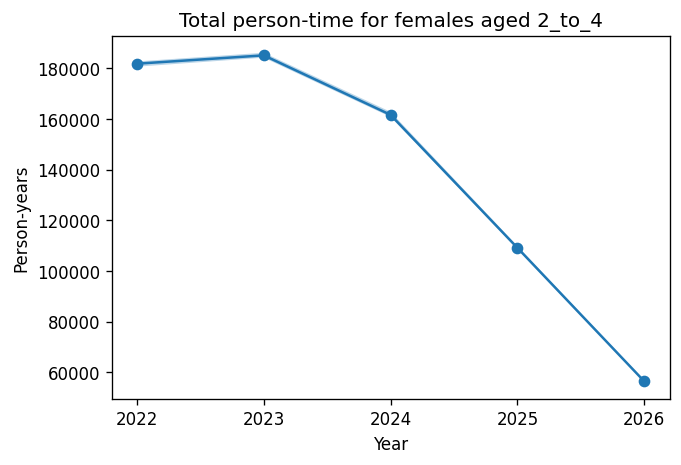

In [41]:
def plot_measure_by_year_for_sex_and_age(ax, df, measure, sex, age_group):
    df = df.query('sex==@sex and age==@age_group')
    ax.plot(df['year'], df['mean'], marker='o', label=f"{sex}, {age_group}")
    ax.fill_between(df['year'], df['lower'], df['upper'], alpha=0.3)
    ax.set_xlabel('Year')
    ax.set_ylabel('Person-years')
    ax.set_title(f"Total {measure} for {sex}s aged {age_group}")

fig, ax = plt.subplots(figsize=(6,4), dpi=120)
plot_measure_by_year_for_sex_and_age(ax, person_time_summary, 'person-time', 'female', '2_to_4')

In [42]:
ax.title.get_text()

'Total person-time for females aged 2_to_4'

## Draw all age groups together for each sex

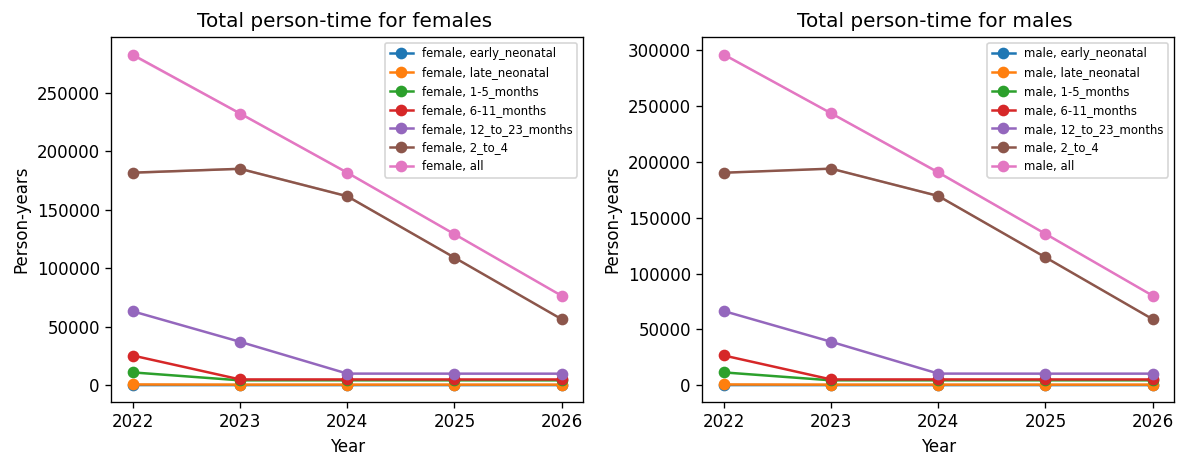

In [43]:
def plot_person_time_for_all_age_groups_by_sex(person_time_summary, sorted_ages, save_filepath=None):
    fig, axs = plt.subplots(1,2, figsize=(10,4), dpi=120)
    for age in sorted_ages:
        plot_measure_by_year_for_sex_and_age(axs[0], person_time_summary, 'person-time', 'female', age)
        plot_measure_by_year_for_sex_and_age(axs[1], person_time_summary, 'person-time', 'male', age)
    for ax in axs:
        ax.legend(fontsize='x-small')
        # Titles were 'Total person-time for (fe)males aged all' from last age group, so reomve the age group
        ax.set_title(ax.title.get_text().replace('aged all', ''))
    fig.tight_layout()
    if save_filepath is not None:
        plt.savefig(save_filepath)

plot_person_time_for_all_age_groups_by_sex(person_time_summary, sorted_ages)

## Now draw separate plots for each age group and sex

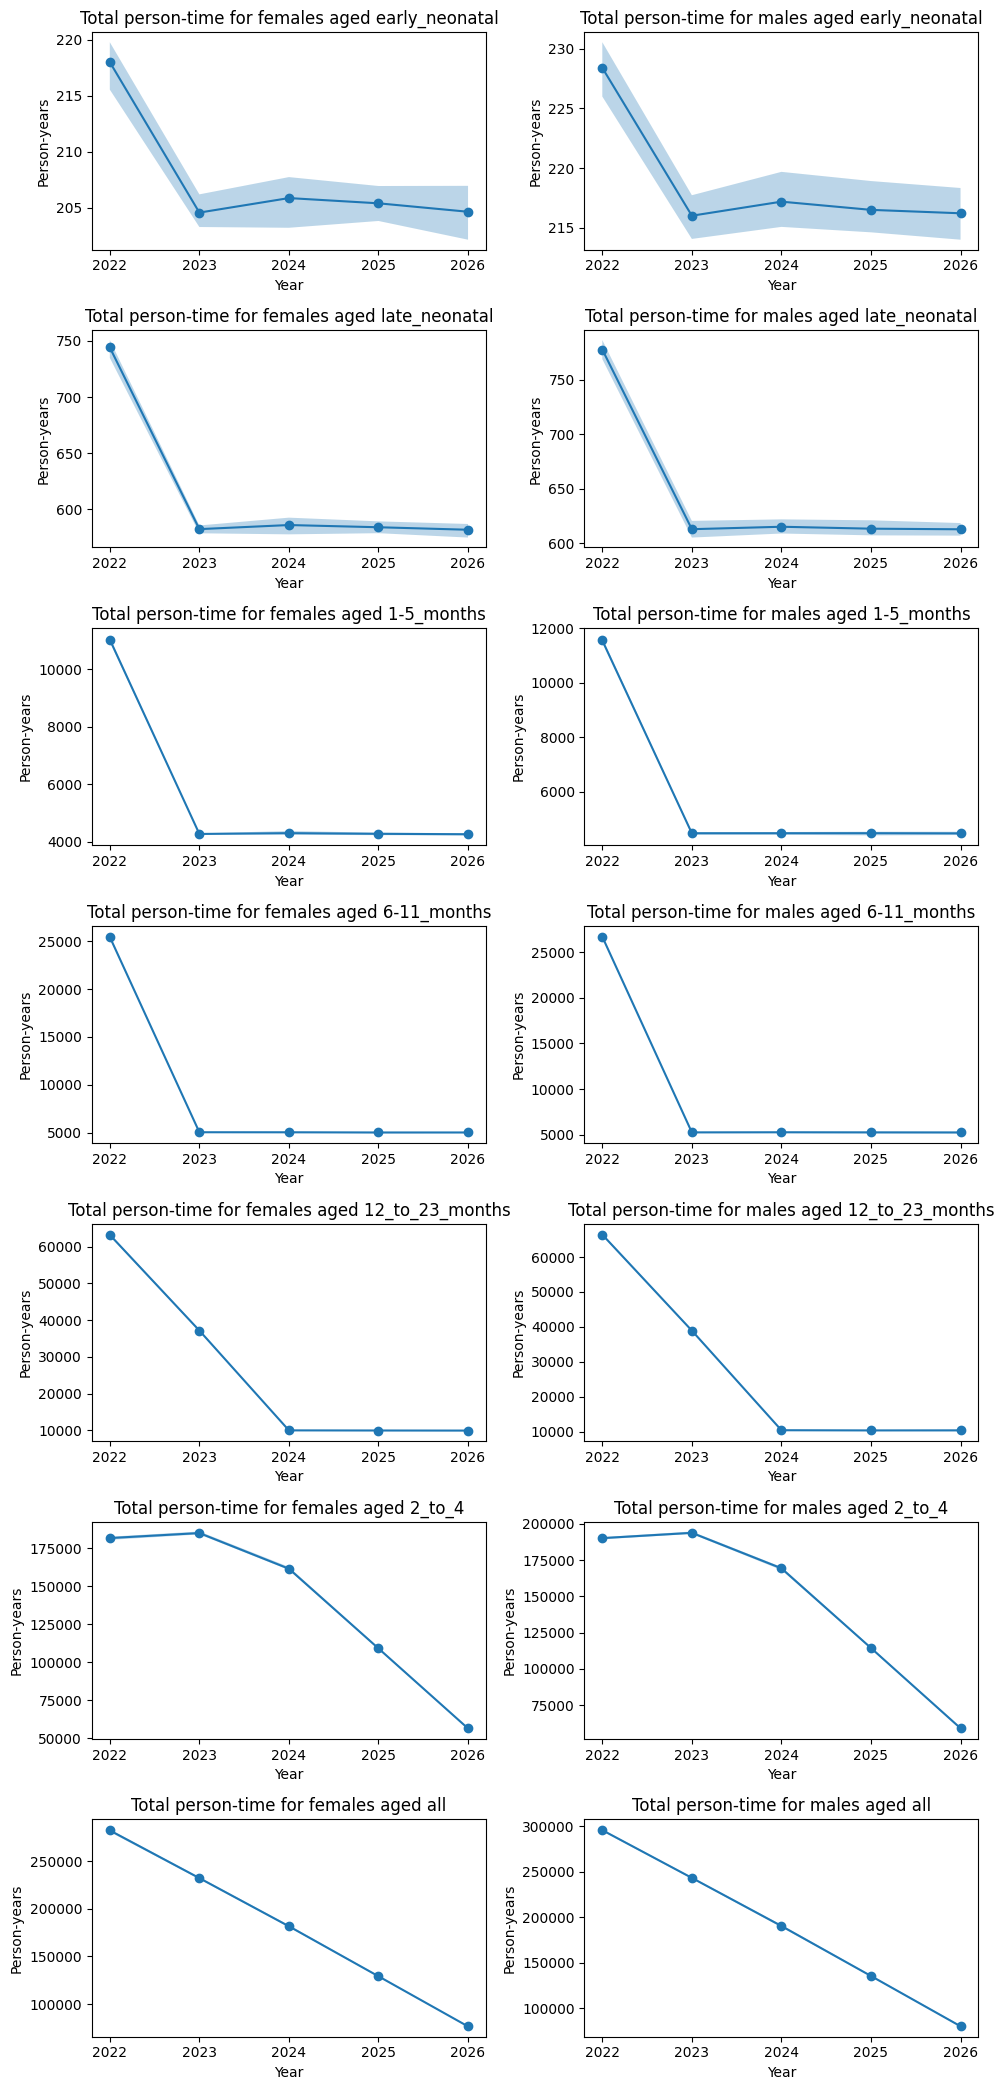

In [44]:
def plot_person_time_separately_by_age_and_sex(person_time_summary, sorted_ages, save_filepath=None):
    fig, axs = plt.subplots(len(sorted_ages), 2, figsize=(10,3*len(sorted_ages)), dpi=100)
    # axs.shape
    for axs_row, age in zip(axs, sorted_ages):
        plot_measure_by_year_for_sex_and_age(axs_row[0], person_time_summary, 'person-time', 'female', age)
        plot_measure_by_year_for_sex_and_age(axs_row[1], person_time_summary, 'person-time', 'male', age)
    fig.tight_layout()
    if save_filepath is not None:
        plt.savefig(save_filepath)
    
plot_person_time_separately_by_age_and_sex(person_time_summary, sorted_ages)

# Save the plots

In [45]:
output_dir

'/ihme/homes/ndbs/vivarium_results/ciff_malnutrition/verification_and_validation/v2.3_wasting_birth_prevalence'

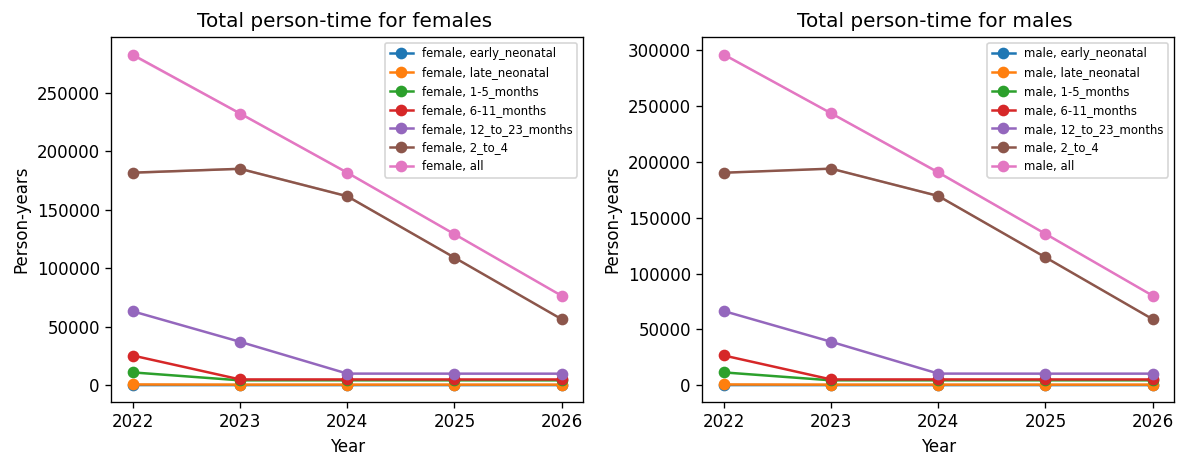

In [46]:
plot_person_time_for_all_age_groups_by_sex(person_time_summary, sorted_ages, f"{output_dir}/person_time_by_sex.pdf")

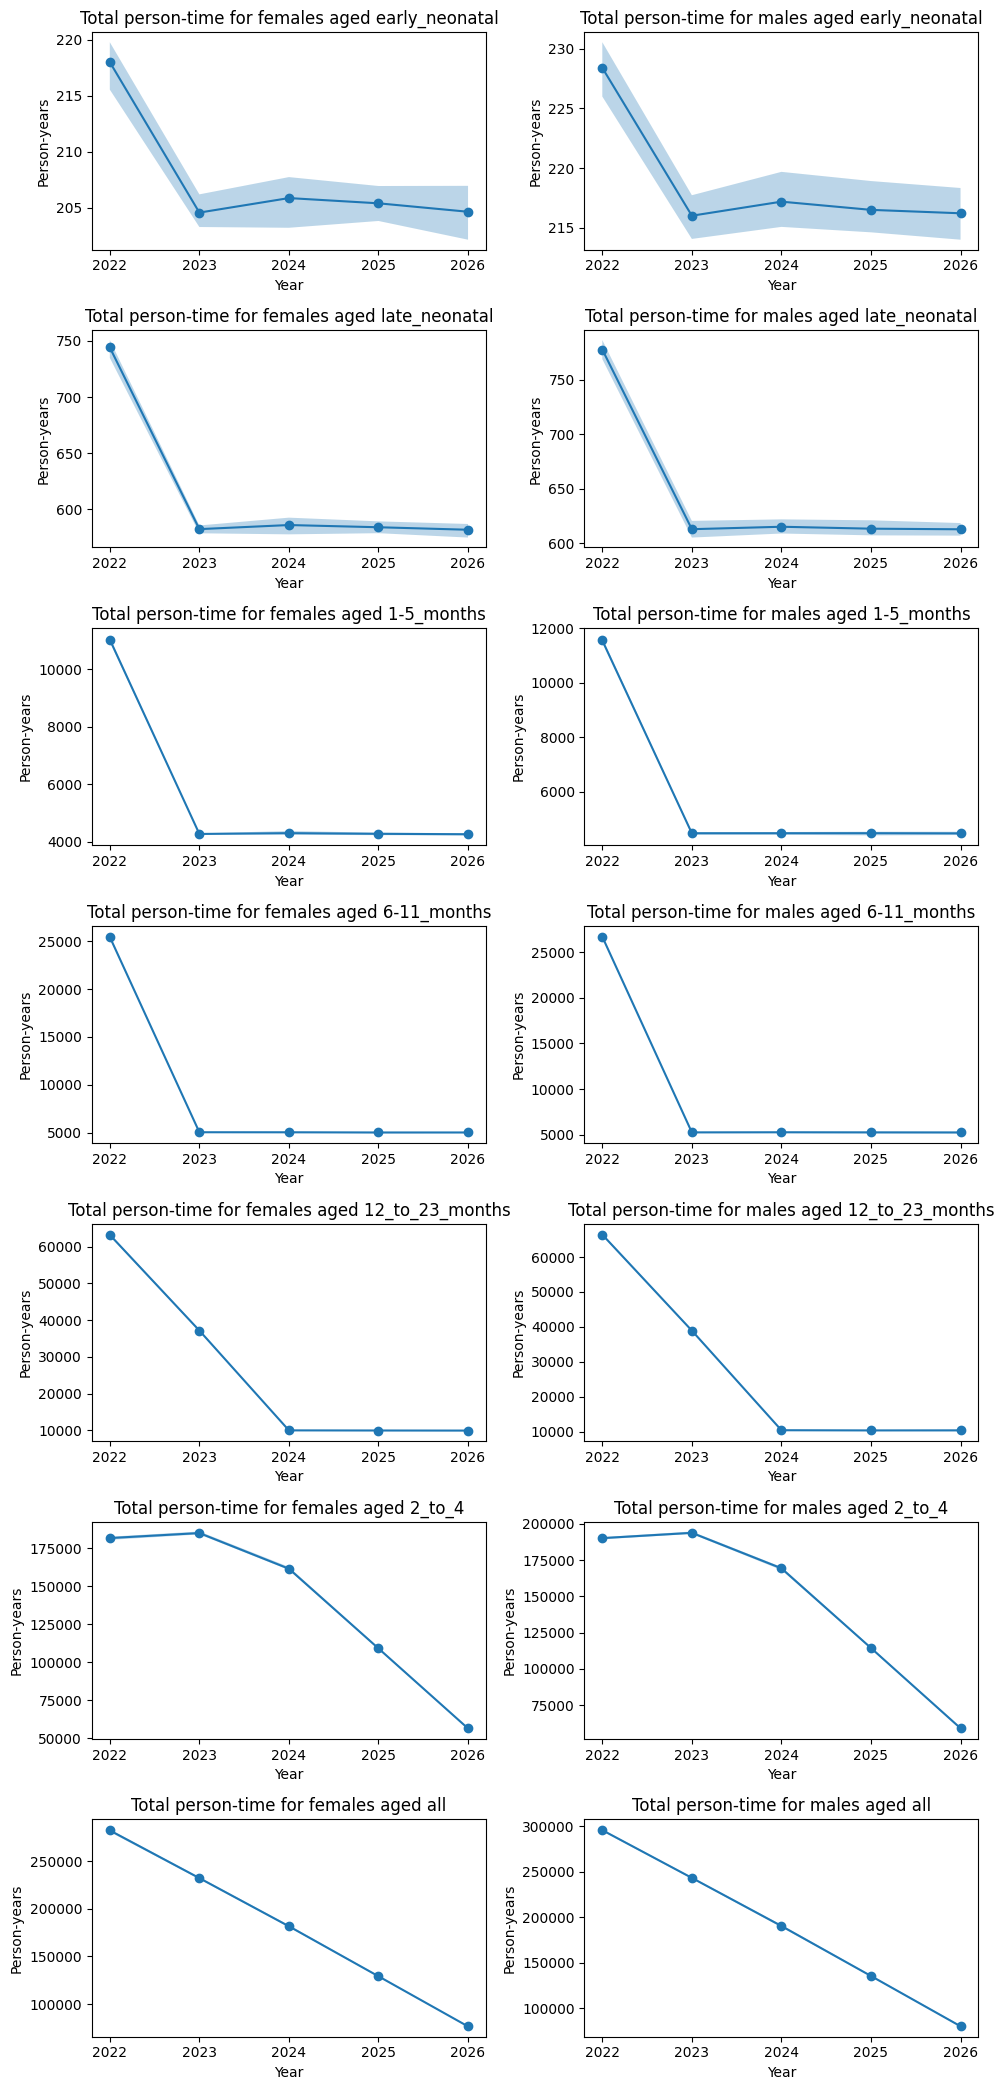

In [47]:
plot_person_time_separately_by_age_and_sex(person_time_summary, sorted_ages, f"{output_dir}/person_time_by_age_sex.pdf")

In [48]:
!ls ~/vivarium_results/ciff_malnutrition/verification_and_validation/v2.3_wasting_birth_prevalence

person_time_by_age_sex_from_wasting_observer.pdf  person_time_by_sex.pdf
person_time_by_age_sex.pdf			  wasting_prevalence.pdf
person_time_by_sex_from_wasting_observer.pdf


# Try plotting person-time from the wasting observer instead of the DD observer

In [49]:
# Write a single function to combine my two functions from ciff_output_processing
def get_mean_lower_upper(df):
    return cop.get_mean_lower_upper(cop.describe(df, percentiles=[0.025,0.975]))
get_mean_lower_upper(d.population)

,measure,scenario,mean,lower,upper
0,total_population,baseline,1.169042e+06,1168346.725,1169772.825
1,total_population_dead,baseline,2.602083e+04,19277.175,29991.650
2,total_population_living,baseline,1.143021e+06,1138909.575,1149729.525
3,total_population_tracked,baseline,1.169042e+06,1168346.725,1169772.825
4,total_population_untracked,baseline,0.000000e+00,0.000,0.000


## Get total person time from the wasting observer by aggergating

In [50]:
d.wasting_state_person_time

,sex,year,wasting_state,measure,input_draw,scenario,value,age
0,female,2022,mild_child_wasting,state_person_time,29,baseline,67.629021,early_neonatal
1,female,2022,mild_child_wasting,state_person_time,29,baseline,242.324435,late_neonatal
2,female,2022,mild_child_wasting,state_person_time,29,baseline,3526.287474,1-5_months
3,female,2022,mild_child_wasting,state_person_time,29,baseline,8192.839151,6-11_months
...,...,...,...,...,...,...,...,...
2876,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,4633.670089,1-5_months
2877,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,5516.294319,6-11_months
2878,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,11032.581793,12_to_23_months
2879,male,2026,susceptible_to_child_wasting,state_person_time,946,baseline,63806.663929,2_to_4


In [51]:
def get_all_ages_person_time(person_time):
    return marginalize(person_time, 'age').assign(age='all')[person_time.columns]

w_person_time = marginalize(d.wasting_state_person_time, 'wasting_state')
w_person_time = get_all_ages_person_time(w_person_time).append(w_person_time)

w_person_time_summary = get_mean_lower_upper(w_person_time)
w_person_time_summary

,age,measure,scenario,sex,year,mean,lower,upper
0,1-5_months,state_person_time,baseline,female,2022,17498.426648,17303.958214,17626.497673
1,1-5_months,state_person_time,baseline,female,2023,6768.698152,6739.572040,6806.245414
2,1-5_months,state_person_time,baseline,female,2024,6817.997718,6732.904689,6923.553867
3,1-5_months,state_person_time,baseline,female,2025,6792.811773,6711.074162,6847.106194
...,...,...,...,...,...,...,...,...
66,late_neonatal,state_person_time,baseline,male,2023,972.292380,959.530903,985.158419
67,late_neonatal,state_person_time,baseline,male,2024,976.838010,962.543566,988.413244
68,late_neonatal,state_person_time,baseline,male,2025,975.552475,961.916496,988.817591
69,late_neonatal,state_person_time,baseline,male,2026,974.345996,962.606194,986.086516


In [52]:
w_person_time_summary.age.unique()

array(['1-5_months', '12_to_23_months', '2_to_4', '6-11_months', 'all',
       'early_neonatal', 'late_neonatal'], dtype=object)

## Draw and save person-time plots from wasting observer

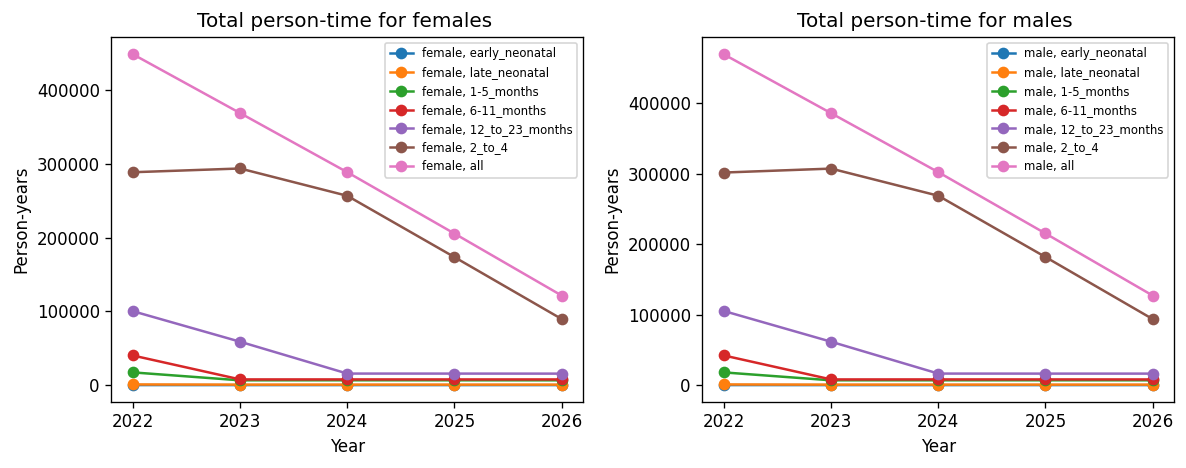

In [53]:
plot_person_time_for_all_age_groups_by_sex(
    w_person_time_summary, sorted_ages, f"{output_dir}/person_time_by_sex_from_wasting_observer.pdf")

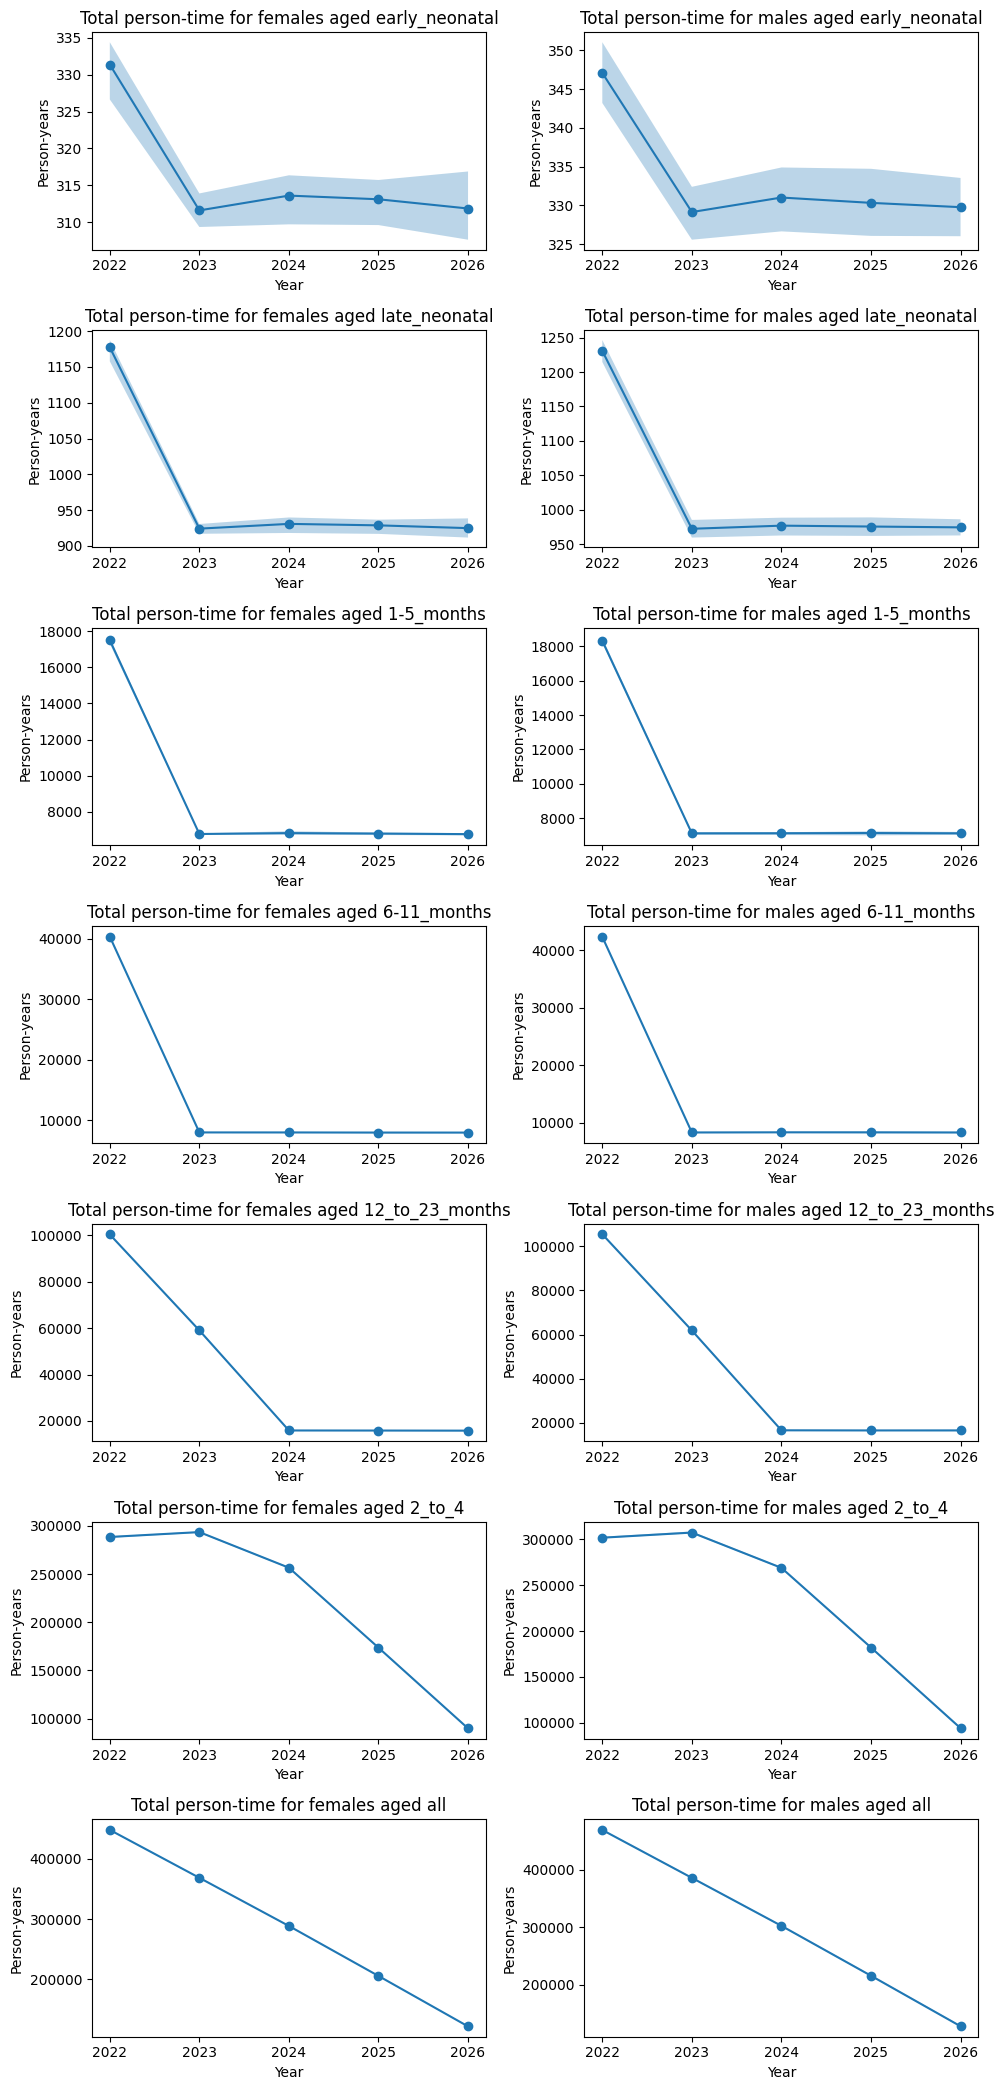

In [54]:
plot_person_time_separately_by_age_and_sex(
    w_person_time_summary, sorted_ages, f"{output_dir}/person_time_by_age_sex_from_wasting_observer.pdf")